In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [6]:
# First we should call some variables from data cleaning process

%store -r df
df = df

%store -r numeric_columns
numeric_columns = numeric_columns

%store -r cat_columns
cat_columns = cat_columns

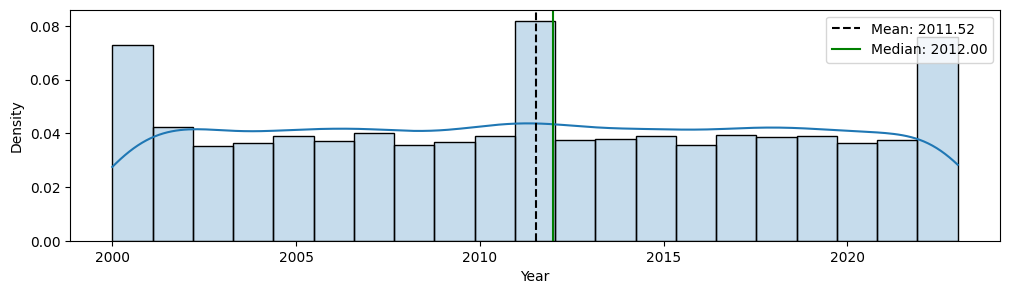

In [13]:
# Descriptive Analysis
# Numeric Data

def kde_plot(x):
    col = x[0]
    plt.figure(figsize=(12, 3))
    sns.histplot(df[col], kde=True, stat="density", alpha=0.25)

    mean = df[col].mean()
    median = df[col].median()

    plt.axvline(mean, color='black', linestyle='dashed', label=f"Mean: {mean:.2f}")
    plt.axvline(median, color='green', linestyle='solid', label=f"Median: {median:.2f}")
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

kde_plot([numeric_columns[0]])


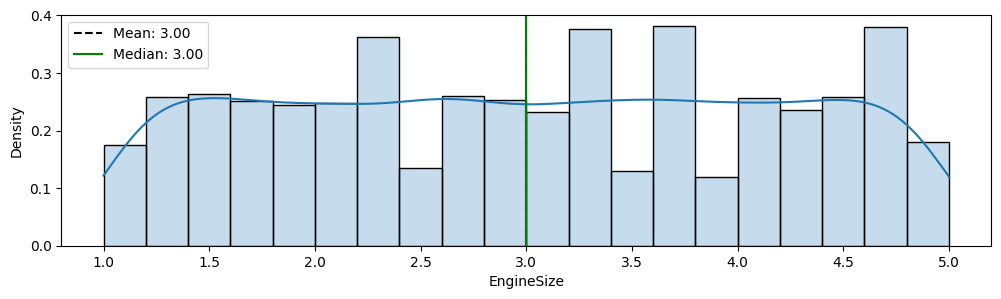

In [14]:
kde_plot([numeric_columns[1]]) # EngineSize

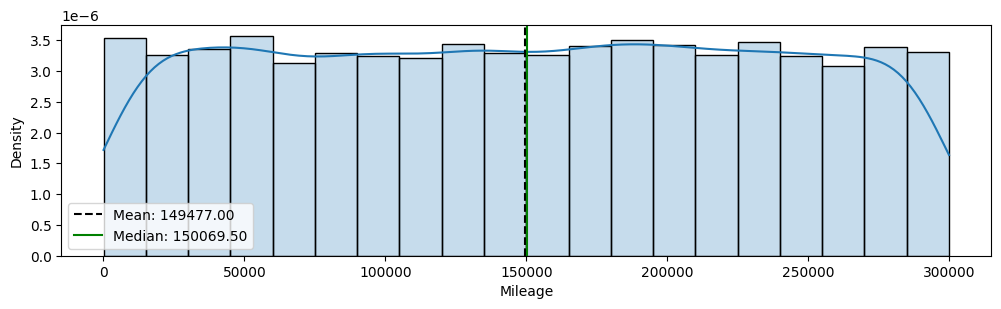

In [15]:
kde_plot([numeric_columns[2]]) # Mileage

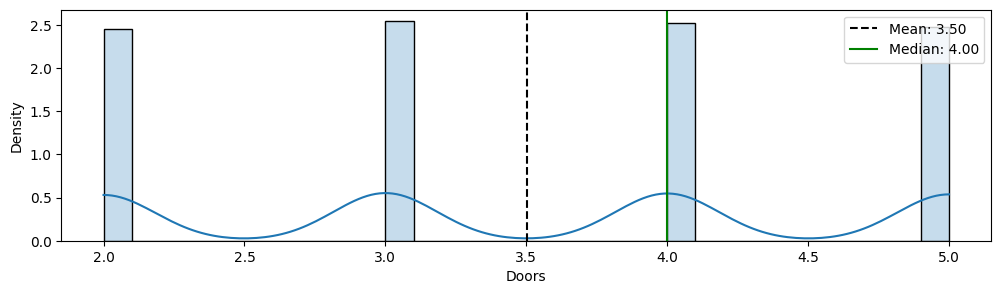

In [16]:
kde_plot([numeric_columns[3]]) # Doors

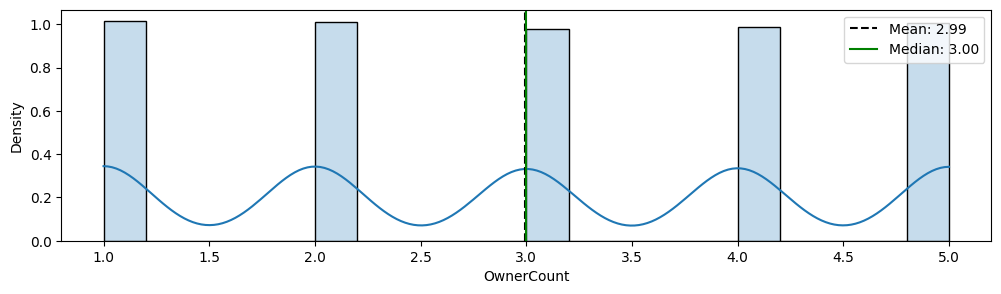

In [17]:
kde_plot([numeric_columns[4]]) # Owners

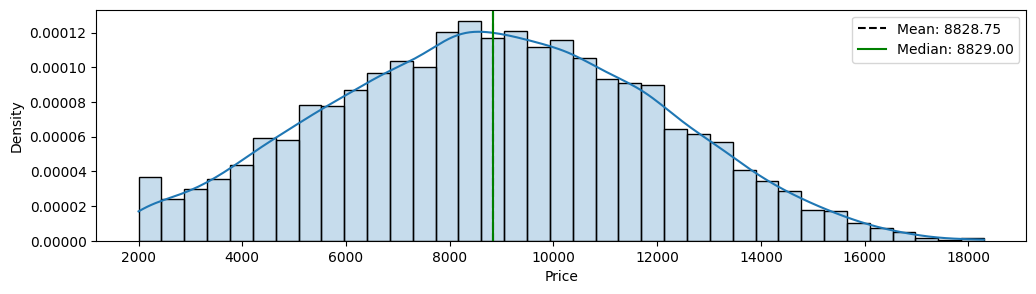

In [18]:
kde_plot([numeric_columns[5]]) # Price

In [19]:
# None of the above column does not need any transformation in later

In [21]:
# Categorical data
# Here, we can find the mode of categorical columns to see which category repeated more than rest

print(cat_columns[0], '->' , df[cat_columns[0]].mode()[0])
print(cat_columns[1], '->' , df[cat_columns[0]].mode()[0])
print(cat_columns[2], '->' , df[cat_columns[0]].mode()[0])
print(cat_columns[3], '->' , df[cat_columns[0]].mode()[0])

Brand -> Audi
Model -> Audi
Fuel -> Audi
Transmission -> Audi


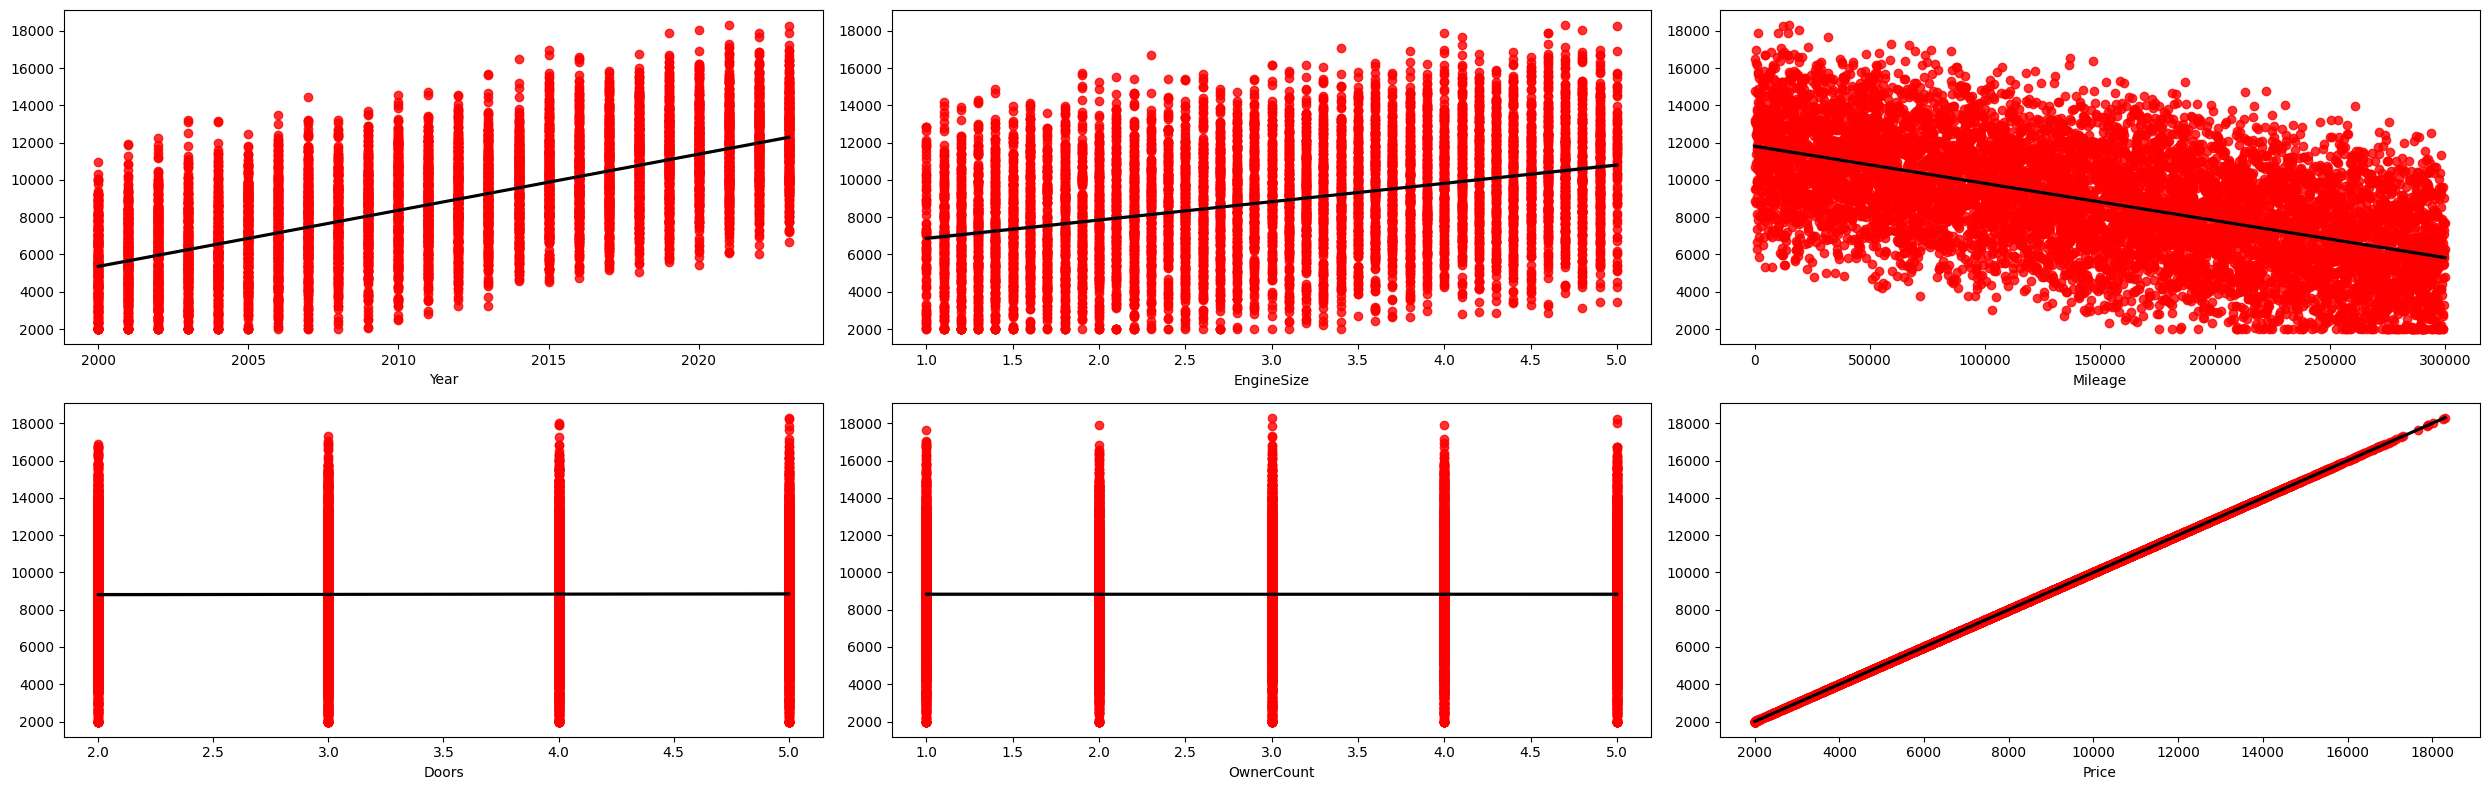

In [27]:
# Correlation data
# Numeric data (Pearson)

fig, axes = plt.subplots(2, 3, figsize=(25, 8))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    sns.regplot(x=col,
               y='Price',
               data=df,
               ax=axes[i],
               scatter_kws={"color": "red"},
               line_kws={"color": "black"})
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [28]:
# Newer models have bigger price and they have positive relationship
# The cars with bigger EngineSize have higher price and they have positive relationship
# The cars with more Mileage have lower price and they have negative relationship

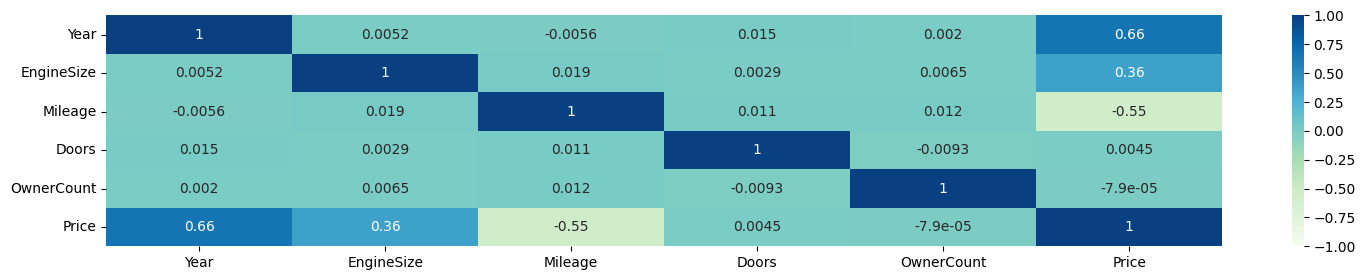

In [30]:
pearson_cor = df[numeric_columns].corr(method='pearson')

plt.figure(figsize=(18, 3))
sns.heatmap(
    pearson_cor,
    vmin=-1,
    vmax=1,
    cmap="GnBu",
    annot=True
)
plt.show()


In [32]:
# Categorical Data (ANOVA)

for i in cat_columns:
    formula = 'Price ~ {}'.format(i)
    model = ols(formula, data=df).fit()
    anova = sm.stats.anova_lm(model, type=2)
    p_value = anova.iloc[0,3]

    print('P-value for price ~ {}: {}'.format(i, p_value))

P-value for price ~ Brand: 1.3968685201053304
P-value for price ~ Model: 0.9143196380684059
P-value for price ~ Fuel: 207.57988529741962
P-value for price ~ Transmission: 274.18491683028


In [33]:
# According to results, we can come up that:
# Fuel and Transmission are significant to explain the price of car,because the p-value is less than 0.05 and we eject null hypothesis
# However Brand and Model might not bring positive impact on our model

In [34]:
# So in the next step we want to see for each label in the above categorical varibales, which of them has the most imapct on price.Thus I make s function to calculate the mean for each label in every single categoricl variable (just the first 5 labels in trems of strength)

In [39]:
def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['Price'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by = mean_by.sort_values(by=['Price'], inplace = False, ascending = False)

    return mean_by.head(5)

In [40]:
mean_pairwise(cat_columns[0]) #Brand

,Price
Brand,
Chevrolet,9018.451815
Audi,8931.886016
Volkswagen,8901.128019
Mercedes,8892.547554
Kia,8885.963731


In [41]:
mean_pairwise(cat_columns[1]) # Model

,Price
Model,
Tiguan,9146.532423
Impala,9094.073944
Equinox,9093.704453
Q5,9028.094406
Corolla,8995.060377


In [42]:
mean_pairwise(cat_columns[2]) # Fuel

,Price
Fuel,
Electric,10061.022662
Hybrid,9094.456689
Diesel,8091.958829
Petrol,8017.726901


In [44]:
mean_pairwise(cat_columns[3]) # Transmission

,Price
Transmission,
Automatic,9954.639456
Manual,8338.461027
Semi-Automatic,8204.673971
